In [ ]:
import pandas as pd
import seaborn as sns 

# Chargement du jeu de données

iris = sns.load_dataset('iris') 

print(iris.head())

C:\Users\Hiba Douik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hiba Douik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


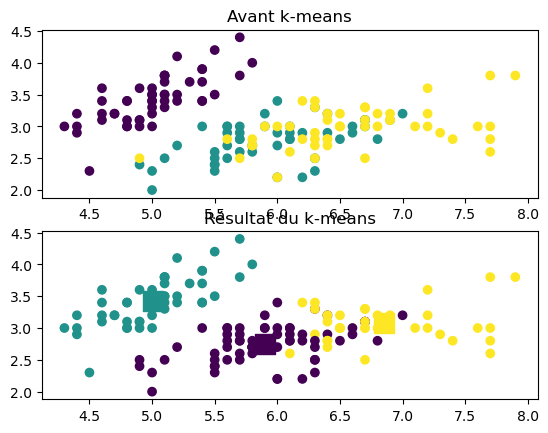

In [2]:
from sklearn.cluster import KMeans

# Extraction de quatre premiers colonnes

observations = iris.iloc[:,0:4] 

nb_groupes = 3

kmeans = KMeans(n_clusters=nb_groupes, random_state=0).fit(observations)

# Affichage des centres

print(kmeans.cluster_centers_)

# Affichage des résultats avant k-means

import matplotlib.pyplot as plt

# Utiliser les noms d'espèce pour colorier les points

iris["species"] = iris["species"].astype('category') 

# 211 : 2 lignes ( nrows ), 1 colonne ( ncols ) et le nombre de plot.

plt.subplot(211) ; plt.title("Avant k-means")

plt.scatter(iris.sepal_length,iris.sepal_width,

          c=iris.species.cat.codes) ;

# Affichage des résultats du k-means

plt.subplot(212) ; plt.title("Résultat du k-means")

centers = pd.DataFrame(kmeans.cluster_centers_) 

centers.columns = observations.columns ; 

plt.scatter(iris.sepal_length,iris.sepal_width,

         c=list(kmeans.predict(observations))) ;

plt.scatter(centers.sepal_length,centers.sepal_width,

         c=range(nb_groupes),s=200,marker="s")

plt.show()

C:\Users\Hiba Douik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hiba Douik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hiba Douik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hiba Douik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with

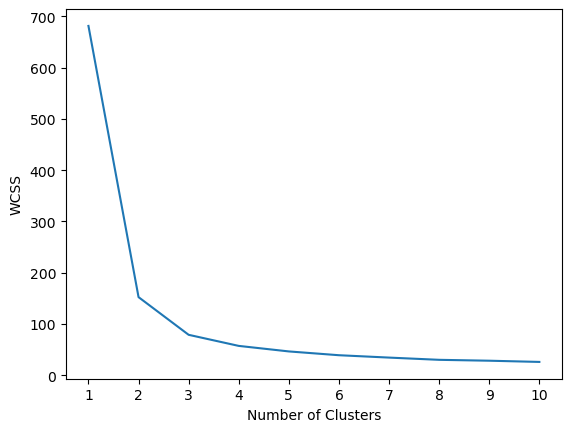

In [10]:
#create list to hold SSE values for each k
# WCSS - the sum of square distances between the centroids and each points.
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(observations)
    wcss.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

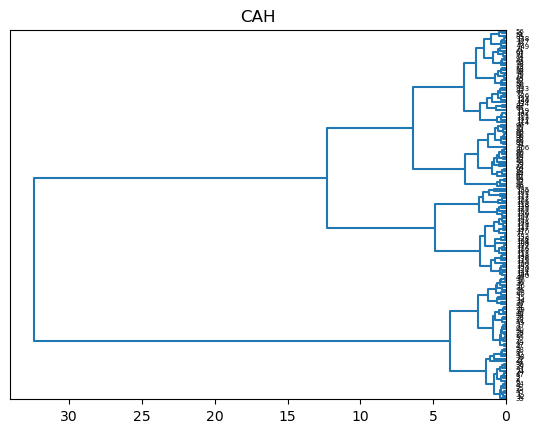

In [7]:
#Chargement des bibiliothèques

from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#Matrice des distances

Z = linkage(iris.iloc[:,0:4],method='ward', metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")

dendrogram(Z,labels=iris.index,orientation='left', color_threshold=0)

plt.show()

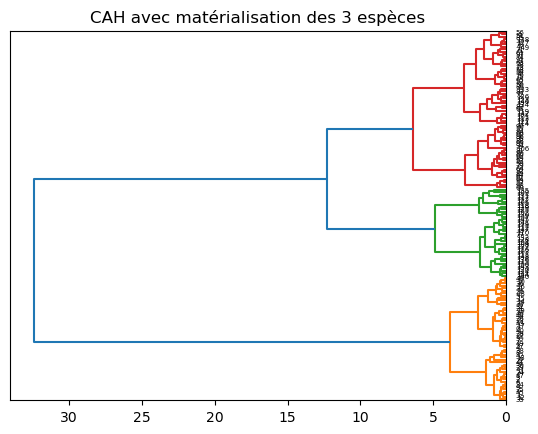

In [8]:
#matérialisation des 3 espèces (hauteur t = 7 à 10)

plt.title('CAH avec matérialisation des 3 espèces')

dendrogram(Z,labels=iris.index,orientation='left',color_threshold=7)

plt.show()


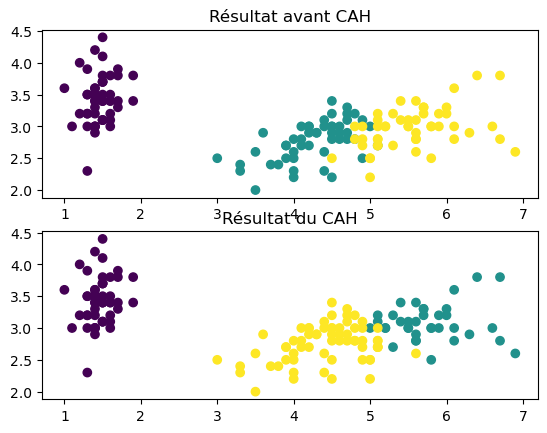

In [9]:
iris["species"] = iris["species"].astype('category') 

plt.subplot(211) ; plt.title("Résultat avant CAH")

plt.scatter(iris.petal_length,iris.sepal_width, c=iris.species.cat.codes) ;


#découpage à la hauteur t = 7 : 3 groupes obtenus

groupes_cah = fcluster(Z,t=7,criterion='distance')

# Affichage des résultats du k-means

plt.subplot(212) ; plt.title("Résultat du CAH")

plt.scatter(iris.petal_length,iris.sepal_width, c=groupes_cah) ;

plt.show()

# PCA

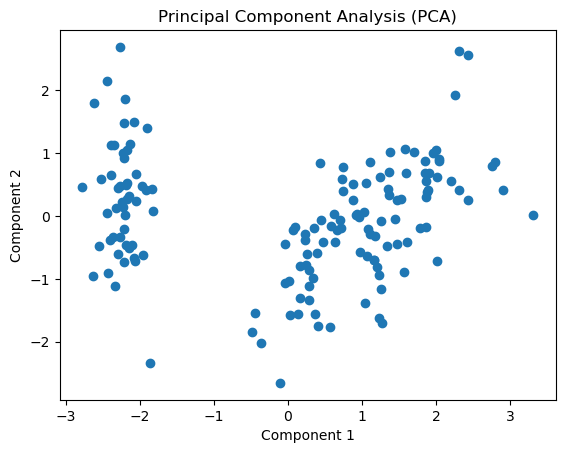

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Chargement du jeu de données
iris = sns.load_dataset('iris')

# Sélection des variables à inclure dans l'analyse de correspondance
data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Standardisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Appliquer PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Affichage des deux premières composantes principales
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Principal Component Analysis (PCA)')
plt.show()


In [24]:
print("Variance expliquée par chaque composante principale:", pca.explained_variance_ratio_)
print("Cumul de la variance expliquée:", sum(pca.explained_variance_ratio_))
print("Composantes principales (vecteurs propres):\n", pca.components_)

Variance expliquée par chaque composante principale: [0.72962445 0.22850762]
Cumul de la variance expliquée: 0.9581320720000164
Composantes principales (vecteurs propres):
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


In [25]:
projected_data = pca.transform(data_scaled)
component_weights = pd.DataFrame(pca.components_, columns=data.columns)
print("Interprétation des composantes principales :\n", component_weights)


Interprétation des composantes principales :
    sepal_length  sepal_width  petal_length  petal_width
0      0.521066    -0.269347      0.580413     0.564857
1      0.377418     0.923296      0.024492     0.066942


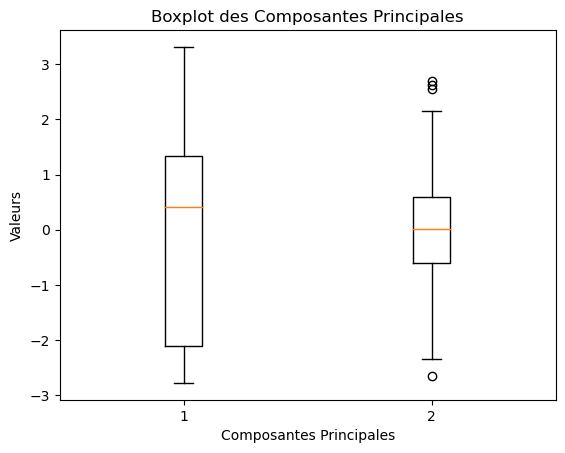

In [26]:
import matplotlib.pyplot as plt

# Création de la boîte à moustaches
plt.boxplot(principalComponents)
plt.title('Boxplot des Composantes Principales')
plt.xlabel('Composantes Principales')
plt.ylabel('Valeurs')
plt.show()

# ANOVA

In [ ]:
from scipy.stats import f_oneway

X = iris.drop('species', axis=1)
y = iris['species']

# Then, assuming you have separate samples for each species:
species = iris['species'].unique()
samples_by_species = [iris[iris['species'] == s]['sepal_length'] for s in species]

# Perform ANOVA
f_statistic, p_value = f_oneway(*samples_by_species)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)
